# __Clustering Users by Description__

In [1]:
import networkx as nx
import pandas as pd

In [2]:
# loading the complete network graph
tt_network = nx.read_gexf('data/networks/complete_network.gexf')

In [3]:
print('Number of users: ', len(tt_network.nodes()))

Number of users:  320143


In [4]:
users = []

for u,d in tt_network.nodes(data=True):
    users.append((u, d['displayname'], d['description']))
    
users_df = pd.DataFrame(users, columns=['user_name', 'display_name', 'description'])
users_df.shape

(320143, 3)

In [5]:
users_df.head()

,user_name,display_name,description
0,seguezaqueu,Zaqueu Castelamary 🏴🏳(SDV ? ),nan
1,zaqueusdvPT,Segue de Volta Esquerdistas ?,nan
2,OSul_noticias,Jornal O Sul,nan
3,farah_julioo,Julio Patriota38🇧🇷🇧🇷🇧🇷,nan
4,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...


In [6]:
users_df.loc[users_df['description'] == 'nan']

,user_name,display_name,description
0,seguezaqueu,Zaqueu Castelamary 🏴🏳(SDV ? ),nan
1,zaqueusdvPT,Segue de Volta Esquerdistas ?,nan
2,OSul_noticias,Jornal O Sul,nan
3,farah_julioo,Julio Patriota38🇧🇷🇧🇷🇧🇷,nan
5,joaodoria45,joaodoria45,nan
...,...,...,...
320134,Eiras_Sergio,Sergio Eiras ⬅️1️⃣3️⃣,nan
320136,ManoelF33446796,Manoel Filho,nan
320138,AbreuWelinson,Welinson Abreu,nan
320139,DeLurimar,Lurimar De Andrade Passos,nan


In [7]:
users_df.drop(users_df.loc[users_df['description'] == 'nan'].index, inplace=True)
users_df.reset_index(inplace=True, drop=True)
users_df.shape

(164944, 3)

In [8]:
users_df.head()

,user_name,display_name,description
0,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...
1,eriicksonsilva,Erickson,"25, BR\nFalo merda sobre o: @vascodagama @manu..."
2,DarlyMenconi,Darly Menconi🏴😷🐊,nobody wins unless everybody wins\npsicóloga🦋
3,danconservador,Danconservador 🇧🇷,Anti-Comunista 🇧🇷..... Nossa bandeira nunca se...
4,SuperTorresmo,Alexandre O Grande,Astrofísico.


## Data Prepocessing

In [9]:
from unidecode import unidecode
import re, string, nltk, demoji
from deep_translator import GoogleTranslator

In [12]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.append('pra')
stop_words.append('tá')
stop_words.append('sobre')

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
    return emoji_pattern.sub(r'', tweet)

def remove_link(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')
    tweet = re.sub(r'pic.twitter\S+', '', tweet)
    return tweet

def remove_av(tweet):
    tweet = re.sub(r'VIDEO:', '', tweet)
    tweet = re.sub(r'AUDIO:', '', tweet)
    return tweet

def preproc(text):
    emojis_dict = demoji.findall(text)
    t_emojis = []
    if bool(emojis_dict):
        for k in  emojis_dict:
    #        t_emojis.append(GoogleTranslator(source='english', target='portuguese').translate(emojis_dict[k]))
            t_emojis.append(emojis_dict[k])
    text = ' '.join(text.split()+t_emojis)
    text = remove_emoji(text)
    text = remove_link(text)
    text = remove_av(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if len(word)>2 and word not in stop_words])
    return text

In [13]:
users_df['preproc_desc'] = users_df['description'].map(lambda x: unidecode(preproc(x)))
users_df.head()

,user_name,display_name,description,preproc_desc
0,thetunnes,Tunnes,21y | 🇧🇷 || Jogador de Valorant 💢 | Web Devel...,jogador valorant web developer anger symbol fl...
1,eriicksonsilva,Erickson,"25, BR\nFalo merda sobre o: @vascodagama @manu...",falo merda vascodagama manutd okcthunder
2,DarlyMenconi,Darly Menconi🏴😷🐊,nobody wins unless everybody wins\npsicóloga🦋,obody wins unless everybody wins psicologa but...
3,danconservador,Danconservador 🇧🇷,Anti-Comunista 🇧🇷..... Nossa bandeira nunca se...,anticomunista bandeira nunca vermelha porra fl...
4,SuperTorresmo,Alexandre O Grande,Astrofísico.,astrofisico


## TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vec = TfidfVectorizer()
vec.fit(users_df['preproc_desc'])
features = vec.transform(users_df['preproc_desc'])
features.shape

(164944, 123080)

## K-Means

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from mpl_toolkits import mplot3d

In [15]:
#silhouette_avg = []
#for cluster in range(2, 10):
#    cls = MiniBatchKMeans(n_clusters=cluster)
#    cls.fit(features)
    #silhouette_avg = v_measure_score(features.toarray(), cls.labels_)

In [16]:
#cls = MiniBatchKMeans(n_clusters=3, random_state=123)
#cls.fit(features)

In [17]:
#cls.predict(features)

In [18]:
#cls.labels_

In [18]:
from sklearn.cluster import KMeans

In [19]:
sum_of_squared_distances = []
for k in range(2,10):
    print('Clustering K = ', k)
    km = KMeans(n_clusters=k)
    km.fit(features)
    sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9


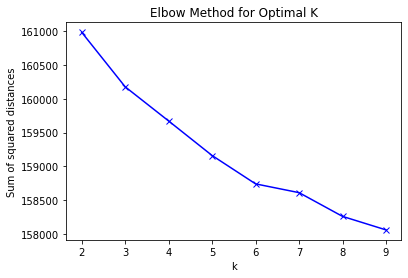

In [20]:
plt.plot(range(2,10), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [21]:
true_k = 6
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

In [22]:
pd.Series(labels).value_counts()

1    135087
2      7484
5      6884
4      6712
3      6380
0      2397
dtype: int64

In [23]:
len(labels)

164944

In [24]:
from wordcloud import WordCloud

In [26]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

In [29]:
result[result['cluster']==0].sample(10)

,user,description,cluster
39390,evandalberto,bolsonarista brasil acima tudo deus acima todos,0
37749,cascaes01,deus acima tudo conservador anticorrupto brasi...,0
73514,SareliMota,deus tudo,0
130518,ClareFernanndez,direita conservadora crista bolsonarista raiz ...,0
118987,kolontaivilela,sorriso acima tudo,0
45522,TelmoSeabra,tudo,0
120643,esagille,amo vida acima tudo,0
42965,CidaAbreu10,brasil acima tudo deus acima todos,0
10969,Toncabrini,busca verdade acima todos deus acima tudo,0
78678,vicentemedeiros,deixe pessoas facam desistir daquilo quer vida...,0


Cluster :  0


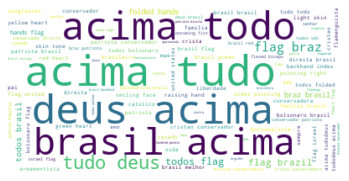

Cluster :  1


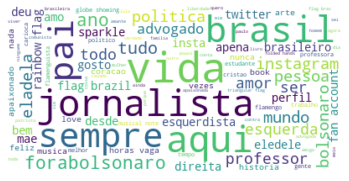

Cluster :  2


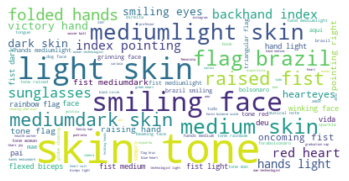

Cluster :  3


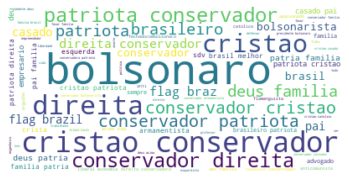

Cluster :  4


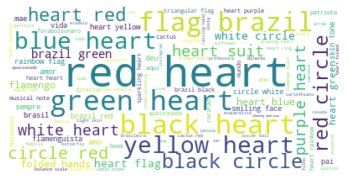

Cluster :  5


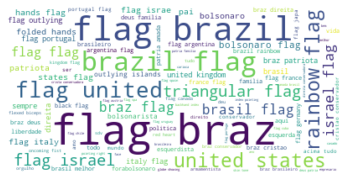

In [28]:
for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [39]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_
pd.Series(labels).value_counts()

0    151645
2     10810
1      2489
dtype: int64

Cluster :  0


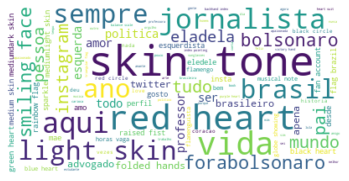

Cluster :  1


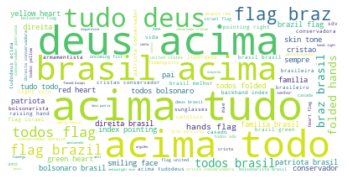

Cluster :  2


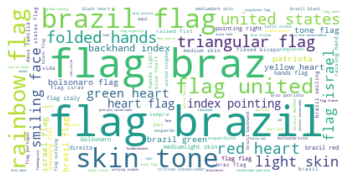

In [40]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [43]:
true_k = 2
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_
pd.Series(labels).value_counts()

0    153681
1     11263
dtype: int64

Cluster :  0


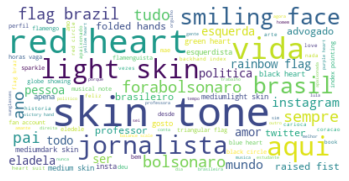

Cluster :  1


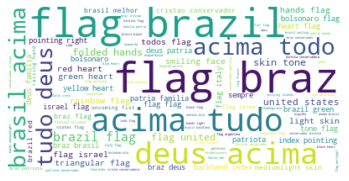

In [44]:
result = pd.DataFrame({'user': users_df['user_name'], 'description': users_df['preproc_desc'], 'cluster':labels})

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['description'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [45]:
result[result['cluster']==0].sample(20)

,user,description,cluster
118395,taizinhalim,plano ser tia rica meio caminho inventei ser a...,0
70783,CesarFreelula,quantas vidas voto segue matando,0
24570,BancadaPSDBrs,perfil real bancada psdb assembleia legislativ...,0
94617,lize2022brasil,jesus senhor,0
105322,emmanelao,prazer cadaver adiado catolico quase engenheir...,0
82151,marcelopalmaa,consultor bem vida,0
94307,karla_monike,professora smepcrj cafe livros ciro turmaboa d...,0
90232,NetoCruzDJ,virginiano ascendente virgem farmaceutico indu...,0
116228,conservador_dir,conservador cristao,0
116221,vanteaway,the books love they love back and just mark ou...,0


In [46]:
result[result['cluster']==1].sample(20)

,user,description,cluster
155525,K4it4,voleibol flag brazil flag portugal volleyba,1
129200,Ferdinando2222,contasem problemas comecamos novofirmes bolson...,1
13043,Hortelli,manutencao informatica equipamentos robo bolso...,1
56210,EDSON_MCP,licenciado matematica pai casado flamenguista ...,1
11694,rodolfo318,brasileiro bolsonaro flag brazil smiling face ...,1
13126,Anderson_SilvO,twitter regras deus acima todos brasil acima t...,1
56764,Edson30767474,brasil acima tudo deus acima todos,1
136535,ItaloMarsili1,twitero vai twitar bombas fuder corruptos bras...,1
123907,mariaalicer_,rainbow flag,1
11193,Fabionasi,patriota conservador twitter existe duas opini...,1


In [49]:
cluster_0 = result[result['cluster']==0]['user'].values
cluster_1 = result[result['cluster']==1]['user'].values

In [73]:
def same_cluster(src, trg):
    if src in cluster_0:
        return trg in cluster_0
    elif src in cluster_1:
        return trg in cluster_1
    else:
        return false
    
def get_cluster_interact(src, trg):
    if src in cluster_0:
        return '0->0' if same_cluster(src, trg) else '0->1'
    elif src in cluster_1:
        return '1->1' if same_cluster(src, trg) else '1->0'
            

In [68]:
len(tt_network.edges())

1674363

In [79]:
cluster_interac = []
#
for s,t in tt_network.edges():
    cluster_interac.append(get_cluster_interact(s,t))

pd.Series(cluster_interac).value_counts()

0->0    377289
0->1    312539
1->0     86664
1->1      8421
dtype: int64

In [82]:
cluster_it_df = pd.DataFrame({'users':list(tt_network.edges()), 'cluster_interac': cluster_interac})

In [83]:
cluster_it_df.head()

,users,cluster_interac
0,"(thetunnes, teddyfps1)",0->0
1,"(eriicksonsilva, teddyfps1)",0->0
2,"(Elmosol, senadorhumberto)",None
3,"(Elmosol, rpsenador)",None
4,"(Elmosol, UOLNoticias)",None


In [86]:
cluster_it_df['users'] = cluster_it_df['users'].map(lambda x: str(x))

In [87]:
cluster_it_df.to_parquet('clusters_interac.parquet')